# K-means clustering

### Importing libraries

In [203]:
# Numpy
import numpy as np
from numpy import concatenate, array
from numpy.random import randn

# Matplotlib
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
%matplotlib inline
#mpl.rc('figure', figsize=(10, 8))

# DBscan from sklearn
from sklearn import cluster, datasets
from sklearn.cluster import DBSCAN
from sklearn import metrics
print 'All libraries loaded.'

All libraries loaded.


### Visualizing the dataset

In [204]:
num = 200
multiplier = 15.
d1 = concatenate((randn(1,num),multiplier*randn(1,num)),0)
d2 = concatenate((randn(1,num),multiplier*randn(1,num)),0)+array([[10.],[0.]])
d3 = concatenate((randn(1,num),multiplier*randn(1,num)),0)+array([[0.],[100.]])
d4 = concatenate((randn(1,num),multiplier*randn(1,num)),0)+array([[10.],[100.]])
d5 = concatenate((randn(1,num),multiplier*randn(1,num)),0)+array([[0.],[200.]])
d6 = concatenate((randn(1,num),multiplier*randn(1,num)),0)+array([[10.],[200.]])

dataArray = concatenate((d1,d2,d3,d4,d5,d6),1).T
         
print dataArray.shape

(1200, 2)


In [205]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[-2, 2],[0, 2], [-2, -2], [0, -2], [2, 2], [2, -2], [4, 2], [4, -2]]
dataArray, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

dataArray = StandardScaler().fit_transform(dataArray)

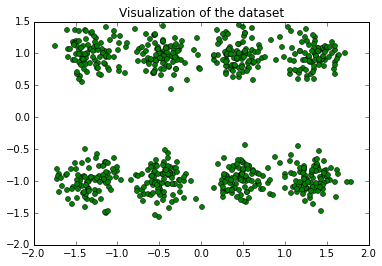

In [206]:
# Plot the dataset

figure,axis = pyplot.subplots(1,1)
axis.plot(dataArray.T[0], dataArray.T[1], 'o', color='g', markersize=5)
# axis.set_xlim(-5,15)
# axis.set_ylim(-50,150)
axis.set_title('Visualization of the dataset')
pyplot.show()

In [207]:
radius=0.3
min_num_of_samples=50

dbscan_inbuilt = DBSCAN(eps=radius, min_samples=min_num_of_samples, metric='euclidean', algorithm='auto').fit(dataArray)
labels = dbscan_inbuilt.labels_
print labels.shape
unique_labels = set(labels)
print unique_labels

# Number of clusters
numOfClusters = len(set(labels)) - (1 if -1 in labels else 0)
print numOfClusters

# distance metric over feature matrix - Euclidean distance
#distance = EuclideanDistance(train_features, train_features)

(750,)
set([0, 1, 2, 3, 4, 5, 6, 7, -1])
8


(750, 2)


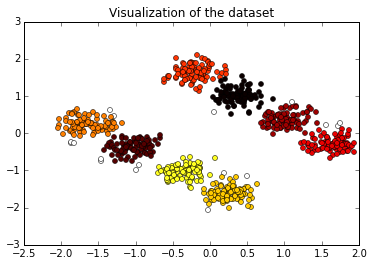

In [208]:
from matplotlib.mlab import PCA
from matplotlib import colors
pca_result = PCA(dataArray)

print pca_result.Y.shape

figure,axis = pyplot.subplots(1,1)
for i in range(0, dataArray.shape[0]):
    clusterColor = 'w'
    marker = 'o'
    if labels[i] != -1:
        m = cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=len(unique_labels)), cmap=cm.hot)
        clusterColor = m.to_rgba(labels[i])
    axis.plot(pca_result.Y[i][0], pca_result.Y[i][1], marker, color=clusterColor, markersize=5)
axis.set_title('Visualization of the dataset')
pyplot.show()

[[ 0.61960787  0.00392157  0.25882354  1.        ]
 [ 0.86628221  0.29011919  0.29780855  1.        ]
 [ 0.97485583  0.55740101  0.32272204  1.        ]
 [ 0.99515571  0.83229528  0.50634374  1.        ]
 [ 0.99807766  0.99923107  0.74602078  1.        ]
 [ 0.83844676  0.9349481   0.60899656  1.        ]
 [ 0.52733565  0.81061131  0.6452134   1.        ]
 [ 0.24006152  0.58239141  0.7208766   1.        ]
 [ 0.36862746  0.30980393  0.63529414  1.        ]]


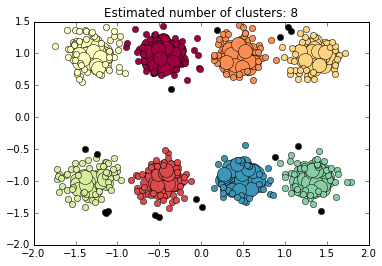

In [209]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
core_samples_mask = np.zeros_like(dbscan_inbuilt.labels_, dtype=bool)
core_samples_mask[dbscan_inbuilt.core_sample_indices_] = True

colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
print colors

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = dataArray[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = dataArray[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % numOfClusters)
plt.show()